In [1]:
from common.path import *
from common.data_processing import *

In [2]:
raw = pd.read_csv(RAW_DATA_DIR / 'INFLUD-02-08-2021.csv', delimiter=';', encoding='iso-8859-1', usecols=['CS_SEXO', 'CO_MUN_NOT', 'DT_NASC', 'DT_NOTIFIC', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE','FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', ])

In [4]:
processed = new_blank_dataframe(len(raw))

processed.cad_dt_nascimento = filter_dates(raw.DT_NASC)
processed.cad_dt_notificacao = filter_dates(raw.DT_NOTIFIC)
unoptimzed_n_way_column_map(processed.cad_sexo, raw.CS_SEXO, ['F','M'], [1,0])
n_way_column_filter(processed.cad_cod_cidade, raw.CO_MUN_NOT, lambda x: x<100000 or x>999999, -1)

n_way_column_map(processed.fr_asma, raw.ASMA, [1,2], [1,0])
n_way_column_map(processed.fr_cardiopatia, raw.CARDIOPATI, [1,2], [1,0])
n_way_column_map(processed.fr_diabetes, raw.DIABETES, [1,2], [1,0])
n_way_column_map(processed.fr_doenca_renal, raw.RENAL, [1,2], [1,0])
n_way_column_map(processed.fr_hematologia, raw.HEMATOLOGI, [1,2], [1,0])
n_way_column_map(processed.fr_hepatia, raw.HEPATICA, [1,2], [1,0])
n_way_column_map(processed.fr_imunodepressao, raw.IMUNODEPRE, [1,2], [1,0])
n_way_column_map(processed.fr_neuropatia, raw.NEUROLOGIC, [1,2], [1,0])
n_way_column_map(processed.fr_obesidade, raw.OBESIDADE, [1,2], [1,0])
n_way_column_map(processed.fr_pneumopatia, raw.PNEUMOPATI, [1,2], [1,0])
n_way_column_map(processed.fr_puerpera, raw.PUERPERA, [1,2], [1,0])
n_way_column_map(processed.fr_snd_down, raw.SIND_DOWN, [1,2], [1,0])

n_way_column_map(processed.sint_dfc_respiratorio, raw.DESC_RESP, [1,2], [1,0])
n_way_column_map(processed.sint_diarreia, raw.DIARREIA, [1,2], [1,0])
n_way_column_map(processed.sint_dispneia, raw.DISPNEIA, [1,2], [1,0])
n_way_column_map(processed.sint_dor_abdominal, raw.DOR_ABD, [1,2], [1,0])
n_way_column_map(processed.sint_dor_garganta, raw.GARGANTA, [1,2], [1,0])
n_way_column_map(processed.sint_fadiga, raw.FADIGA, [1,2], [1,0])
n_way_column_map(processed.sint_febre, raw.FEBRE, [1,2], [1,0])
n_way_column_map(processed.sint_prd_olfato, raw.PERD_OLFT, [1,2], [1,0])
n_way_column_map(processed.sint_prd_paladar, raw.PERD_PALA, [1,2], [1,0])
n_way_column_map(processed.sint_saturacao, raw.SATURACAO, [1,2], [1,0])
n_way_column_map(processed.sint_tosse, raw.TOSSE, [1,2], [1,0])
n_way_column_map(processed.sint_vomito, raw.VOMITO, [1,2], [1,0])

fill_column(processed.vac_covid, 0)

<AxesSubplot:>

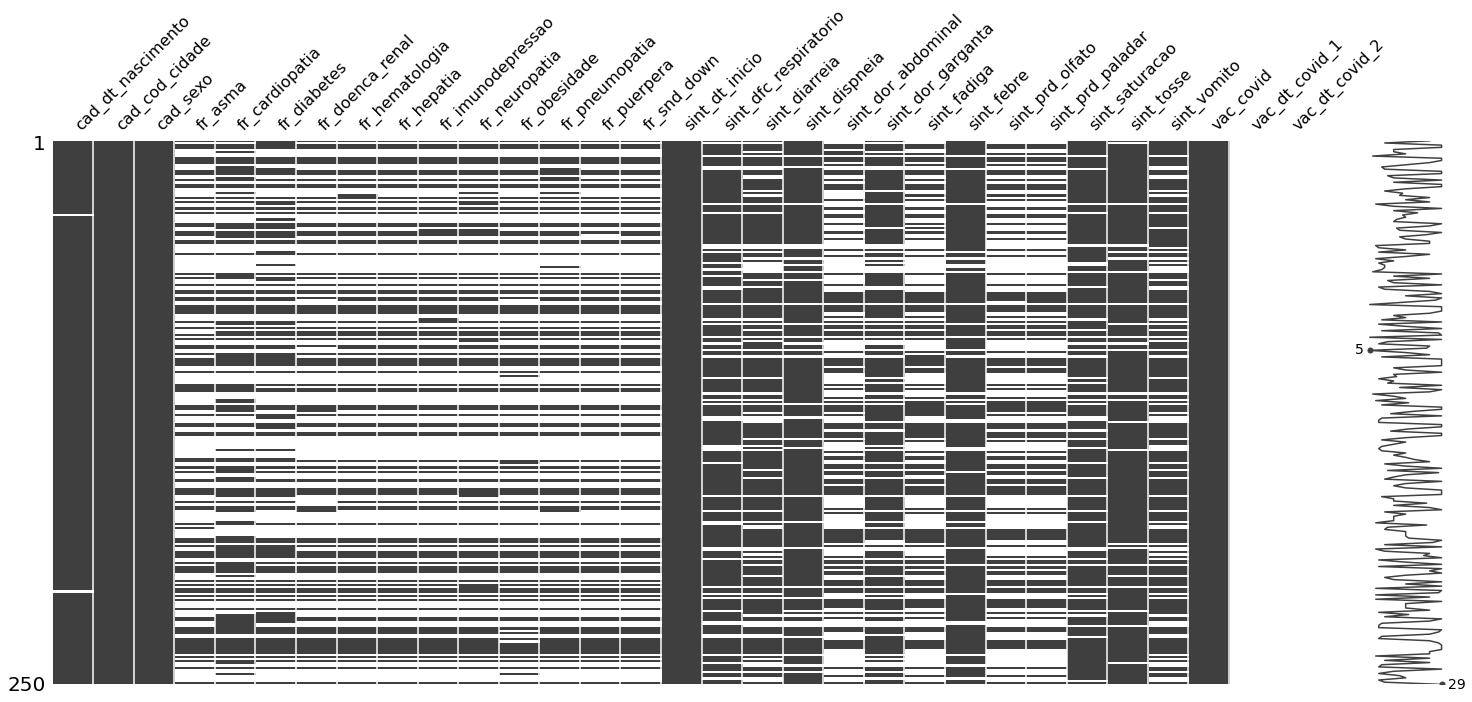

In [5]:
import missingno as msno

msno.matrix(processed.sample(250))

In [6]:
#processed.to_parquet(PROCESSED_DATA_DIR / f'srag_2021_{str(datetime.datetime.utcnow()).replace(" ", "_").replace(":","-")}.parquet')